In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv("clean_data.csv")

In [14]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [16]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [17]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
430340,148.0,122.666667
430341,131.0,117.000000
430342,140.0,120.000000
430343,143.0,121.000000
430344,171.0,130.333333


In [18]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
430340,220.78348,180.52232
430341,220.78348,180.52232
430342,220.78348,180.52232
430343,220.78348,180.52232
430344,220.78348,180.52232


In [19]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['date','state','si','ni','rpi','spi','AQI']]
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


In [20]:
df.to_csv('data_1st.csv',index=False)

In [21]:
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

C:\Users\TNK\AppData\Local\Temp\ipykernel_8032\4064763646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df['date'])


,AQI,date
430325,180.52232,2015-10-23
430326,180.52232,2015-10-28
430327,180.52232,2015-10-31
430328,180.52232,2015-11-05
430329,180.52232,2015-11-07
430330,180.52232,2015-11-10
430331,180.52232,2015-11-11
430332,180.52232,2015-11-16
430333,180.52232,2015-11-20
430334,180.52232,2015-11-26


In [22]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

C:\Users\TNK\AppData\Local\Temp\ipykernel_8032\2822222202.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=df.set_index('date').resample('M')["AQI"].mean()


date
1987-01-31    259.563812
1987-02-28    253.636467
1987-03-31    322.938366
1987-04-30    227.085685
1987-05-31    336.653480
Freq: ME, Name: AQI, dtype: float64

In [23]:
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,259.563812
1,1987-02-28,253.636467
2,1987-03-31,322.938366
3,1987-04-30,227.085685
4,1987-05-31,336.653480


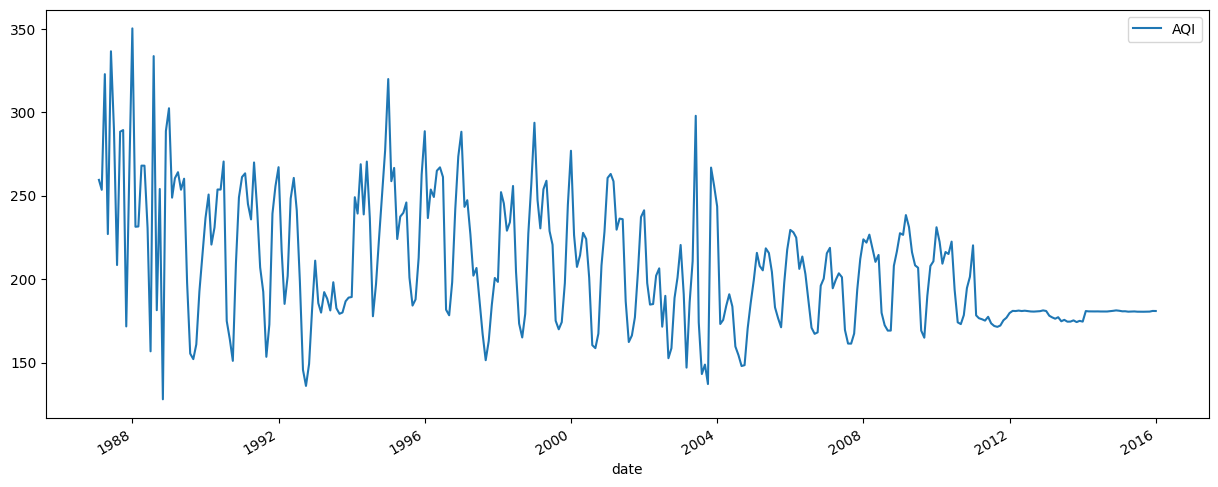

In [24]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

In [37]:
import pandas as pd

# Read and preprocess data
df = pd.read_csv("data_1st.csv")
df = df.drop(columns=['state'])

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Group by year and month, calculate mean
monthly_mean = df.groupby(df["date"].dt.to_period("M")).mean()

# Drop the original 'date' column to avoid confusion (optional)
# monthly_mean = monthly_mean.drop(columns=["date"])  # This line is unnecessary since "date" isn't in monthly_mean
monthly_mean = monthly_mean.drop(columns=['date'])

# Move index to a column
monthly_mean.reset_index(inplace=True)

# Rename the index column to 'date'
monthly_mean.rename(columns={"date": "period"}, inplace=True)  # To avoid confusion, keep the Period type as "period"

# Convert 'period' to datetime (optional)
monthly_mean['date'] = monthly_mean['period'].dt.to_timestamp()

# cols = [monthly_mean.columns[-1]] + list(monthly_mean.columns[:-1])

# # Reorder the DataFrame columns
# monthly_mean = monthly_mean[cols]

monthly_mean = monthly_mean.drop(columns=['date'])

# Show the first few rows to verify
print(monthly_mean.head())


    period         si         ni         rpi         spi         AQI
0  1987-01  22.348140  37.779175  109.610928  250.052355  259.563812
1  1987-02  24.876742  44.821294  109.610928  239.155179  253.636467
2  1987-03  24.794715  43.571985  109.610928  306.273945  322.938366
3  1987-04  23.476983  35.470529  109.610928  195.811594  227.085685
4  1987-05  24.704336  49.439325  109.610928  315.872807  336.653480


In [38]:

long = int(len(monthly_mean)*0.6)

train = monthly_mean.iloc[:long]
test = monthly_mean.iloc[long:]

train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [39]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

# Load the training data
data = pd.read_csv('train.csv', index_col=0)

# Reset index to get 'period' as a column if it's in the index
if 'period' not in data.columns:
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'period'}, inplace=True)

# Ensure the date column is in datetime format
data['period'] = pd.to_datetime(data['period'], format='%Y-%m')

# Create lag features
for lag in range(1, 2):  # Create lag features for 1 to 3 previous time steps
    data[f'AQI_lag_{lag}'] = data['AQI'].shift(lag)

# Drop rows with NaN values due to lagging
data = data.dropna()

# Features and target
features = [col for col in data.columns if col not in ['period', 'AQI']]
X = data[features]
y = data['AQI']

# Train-test split (use the last 20% of data as the test set)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the model
model = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [500],  # Number of trees
    'learning_rate': [0.05],  # Learning rate
    'max_depth': [10],  # Depth of each tree
    'subsample': [0.7],  # Fraction of samples to use
    'colsample_bytree': [1.0],  # Fraction of features to use
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save the best model
best_model.save_model('best_model.json')

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Create a Plotly Figure
fig = go.Figure()

# Add train data
fig.add_trace(go.Scatter(x=data['period'][:train_size], y=y_train,
                         mode='lines', name='Train',
                         line=dict(color='blue')))

# Add test data
fig.add_trace(go.Scatter(x=data['period'][train_size:], y=y_test,
                         mode='lines', name='Test',
                         line=dict(color='green')))

# Add predictions
fig.add_trace(go.Scatter(x=data['period'][train_size:], y=y_pred,
                         mode='lines', name='Prediction',
                         line=dict(color='red', dash='dot')))

# Update layout
fig.update_layout(
    title='AQI Forecasting - Train, Test, and Predictions',
    xaxis_title='period',
    yaxis_title='AQI',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

# Show metrics in the plot
fig.add_annotation(
    x=data['period'].iloc[-1],
    y=max(y_test),
    text=f"<b>RMSE:</b> {rmse:.2f}<br><b>MAE:</b> {mae:.2f}<br><b>R²:</b> {r2:.2f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.7)",
    bordercolor="black",
    borderwidth=1
)

# Show the plot
fig.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.7}
RMSE: 8.209977233018886
MAE: 6.331677734620436
R²: 0.954040996430873


In [40]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

# Load the new data
new_data = pd.read_csv('test.csv', index_col=0)

# Reset index to get 'period' as a column if it's in the index
if 'period' not in new_data.columns:
    new_data.reset_index(inplace=True)
    new_data.rename(columns={'index': 'period'}, inplace=True)

# Ensure the date column is in datetime format
new_data['period'] = pd.to_datetime(new_data['period'], format='%Y-%m')

# Create lag features for the new data (same as in the training data)
for lag in range(1, 2):
    new_data[f'AQI_lag_{lag}'] = new_data['AQI'].shift(lag)

# Drop rows with NaN values due to lagging (same as before)
new_data = new_data.dropna()

# Features for the new data (same as the training data)
features = [col for col in new_data.columns if col not in ['period', 'AQI']]
X_new = new_data[features]

# Load the trained model
model = XGBRegressor()
model.load_model('best_model.json')  # Replace with your saved model path

# Make predictions using the trained model
y_new_pred = model.predict(X_new)

# If you have the actual AQI values for the new data, you can compare them with the predictions
# Assuming you have the 'AQI' column in 'new_data.csv' for evaluation
if 'AQI' in new_data.columns:
    y_new_actual = new_data['AQI']
    rmse_new = np.sqrt(mean_squared_error(y_new_actual, y_new_pred))
    mae_new = mean_absolute_error(y_new_actual, y_new_pred)
    r2_new = r2_score(y_new_actual, y_new_pred)
    
    print(f"RMSE on new data: {rmse_new}")
    print(f"MAE on new data: {mae_new}")
    print(f"R² on new data: {r2_new}")

# Optionally, visualize the results (if you want to compare predictions vs. actual)
fig_new = go.Figure()

# Add new data actual AQI (if available)
if 'AQI' in new_data.columns:
    fig_new.add_trace(go.Scatter(x=new_data['period'], y=new_data['AQI'],
                                mode='lines', name='Actual AQI',
                                line=dict(color='blue')))

# Add predictions
fig_new.add_trace(go.Scatter(x=new_data['period'], y=y_new_pred,
                            mode='lines', name='Predicted AQI',
                            line=dict(color='red', dash='dot')))

# Update layout
fig_new.update_layout(
    title='AQI Predictions on New Data',
    xaxis_title='Period',
    yaxis_title='AQI',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

# Show the plot
fig_new.show()


RMSE on new data: 6.937942920549846
MAE on new data: 5.862866886580575
R² on new data: 0.8775773473203331


In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib  # For saving the model

# Load the training data
train_data = pd.read_csv('train.csv', index_col=0)

# Reset index to get 'period' as a column if it's in the index
if 'period' not in train_data.columns:
    train_data.reset_index(inplace=True)
    train_data.rename(columns={'index': 'period'}, inplace=True)

# Ensure the date column is in datetime format
train_data['period'] = pd.to_datetime(train_data['period'], format='%Y-%m')

# Set the 'period' column as the index
train_data.set_index('period', inplace=True)

# Ensure the AQI column is numeric (in case there are any issues with the data)
train_data['AQI'] = pd.to_numeric(train_data['AQI'], errors='coerce')

# Drop rows with NaN values (because of non-numeric AQI or missing values)
train_data = train_data.dropna()

# Create lag features for the training data (same as the test data)
# Example: create a lag of 1 step (you can add more lags based on your model needs)
train_data['AQI_lag_1'] = train_data['AQI'].shift(1)

# Drop rows with NaN values due to lagging
train_data = train_data.dropna()

# Features for the model (use lag features and other potential features if available)
features = [col for col in train_data.columns if col not in ['AQI']]

# Define the features (X) and target (y) for training the model
X_train = train_data[features]
y_train = train_data['AQI']

# Initialize the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Save the model to disk for later use (e.g., testing)
joblib.dump(model_rf, 'random_forest_model.pkl')

# Make predictions on the training data (optional for evaluation)
y_train_pred = model_rf.predict(X_train)

# Evaluate the model on training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Training MAE: {mae_train}")
print(f"Training R²: {r2_train}")


Training RMSE: 2.906844603221727
Training MAE: 2.069777318149392
Training R²: 0.9955679523088368


In [44]:
import pandas as pd
import numpy as np
import joblib  # For loading the saved model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

# Load the new data (testing data)
new_data = pd.read_csv('test.csv', index_col=0)

# Reset index to get 'period' as a column if it's in the index
if 'period' not in new_data.columns:
    new_data.reset_index(inplace=True)
    new_data.rename(columns={'index': 'period'}, inplace=True)

# Ensure the date column is in datetime format
new_data['period'] = pd.to_datetime(new_data['period'], format='%Y-%m')

# Set the 'period' column as the index
new_data.set_index('period', inplace=True)

# Ensure the AQI column is numeric (in case there are any issues with the data)
new_data['AQI'] = pd.to_numeric(new_data['AQI'], errors='coerce')

# Drop rows with NaN values (because of non-numeric AQI or missing values)
new_data = new_data.dropna()

# Create lag features for the new data (same as in the training data)
new_data['AQI_lag_1'] = new_data['AQI'].shift(1)

# Drop rows with NaN values due to lagging
new_data = new_data.dropna()

# Features for the model (use lag features and other potential features if available)
features = [col for col in new_data.columns if col not in ['AQI']]

# Define the features (X) and target (y) for testing the model
X_new = new_data[features]
y_new = new_data['AQI']

# Load the trained model from disk
model_rf = joblib.load('random_forest_model.pkl')

# Make predictions on the new (testing) data
y_new_pred = model_rf.predict(X_new)

# If you have the actual AQI values for the new data, you can compare them with the predictions
# Assuming you have the 'AQI' column in 'new.csv' for evaluation
if 'AQI' in new_data.columns:
    y_new_actual = new_data['AQI']
    rmse_new = np.sqrt(mean_squared_error(y_new_actual, y_new_pred))
    mae_new = mean_absolute_error(y_new_actual, y_new_pred)
    r2_new = r2_score(y_new_actual, y_new_pred)
    
    print(f"RMSE on new data: {rmse_new}")
    print(f"MAE on new data: {mae_new}")
    print(f"R² on new data: {r2_new}")

# Optionally, visualize the results (if you want to compare predictions vs. actual)
fig_new = go.Figure()

# Add new data actual AQI (if available)
if 'AQI' in new_data.columns:
    fig_new.add_trace(go.Scatter(x=new_data.index, y=new_data['AQI'],
                                mode='lines', name='Actual AQI',
                                line=dict(color='blue')))

# Add predictions
fig_new.add_trace(go.Scatter(x=new_data.index, y=y_new_pred,
                            mode='lines', name='Predicted AQI',
                            line=dict(color='red', dash='dot')))

# Update layout
fig_new.update_layout(
    title='AQI Predictions on New Data using Random Forest',
    xaxis_title='Period',
    yaxis_title='AQI',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

# Show the plot
fig_new.show()


RMSE on new data: 10.56238812753037
MAE on new data: 8.335415178457868
R² on new data: 0.7162573732907738
